In [1]:
pip install tiingo

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/

/content/drive


In [4]:
from tiingo import TiingoClient
# Set TIINGO_API_KEY in your environment variables in your .bash_profile, OR
# pass a dictionary with 'api_key' as a key into the TiingoClient.
config = {}

# To reuse the same HTTP Session across API calls (and have better performance), include a session key.
config['session'] = True

# If you don't have your API key as an environment variable,
# pass it in via a configuration dictionary.
config['api_key'] = "333019432fe95089c689230a0180e9d9b5efc0b8"

# Initialize
client = TiingoClient(config)

In [5]:
ticker_history = client.get_dataframe('AAPL',
                                      startDate='2017-01-01',
                                      endDate='2021-05-01')
ticker_history_2 = client.get_dataframe('AAPL',
                                      startDate='2013-01-01',
                                      endDate='2016-12-31')

In [10]:
ticker_history

ticker_history_2

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2013-01-02 00:00:00+00:00,549.0300,555.0000,541.6300,553.820,20018500,17.065806,17.251375,16.835788,17.214696,560518560,0.0,1.0
2013-01-03 00:00:00+00:00,542.0959,549.6700,541.0000,547.880,12605900,16.850269,17.085699,16.816205,17.030060,352965552,0.0,1.0
2013-01-04 00:00:00+00:00,527.0000,538.6299,525.8286,536.965,21226200,16.381035,16.742534,16.344624,16.690783,594334194,0.0,1.0
2013-01-07 00:00:00+00:00,523.9000,529.3000,515.2000,522.000,17291300,16.284676,16.452527,16.014249,16.225617,484156884,0.0,1.0
2013-01-08 00:00:00+00:00,525.3100,531.8900,521.2500,529.210,16382400,16.328504,16.533034,16.202305,16.449730,458707658,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23 00:00:00+00:00,116.5200,116.5200,115.5900,115.590,14249484,27.585196,27.585196,27.365026,27.365026,56997936,0.0,1.0
2016-12-27 00:00:00+00:00,117.2600,117.8000,116.4900,116.520,18296855,27.760386,27.888226,27.578094,27.585196,73187420,0.0,1.0
2016-12-28 00:00:00+00:00,116.7600,118.0166,116.2000,117.520,20905892,27.642014,27.939505,27.509439,27.821939,83623568,0.0,1.0


In [15]:
ticker_history.to_csv('AAPL_stocks_train.csv',index='False')
ticker_history_2.to_csv('AAPL_stocks_test.csv',index ='False')

In [17]:
import pandas as pd
df = pd.read_csv('AAPL_stocks_train.csv')
df_3 = pd.read_csv('AAPL_stocks_train.csv')

In [18]:
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2017-01-03 00:00:00+00:00,116.15,116.3300,114.76,115.80,28781865,27.497602,27.540215,27.168530,27.414742,115127460,0.0,1.0
1,2017-01-04 00:00:00+00:00,116.02,116.5100,115.75,115.85,21118116,27.466825,27.582829,27.402905,27.426579,84472464,0.0,1.0
2,2017-01-05 00:00:00+00:00,116.61,116.8642,115.81,115.92,22193587,27.606503,27.666683,27.417109,27.443151,88774348,0.0,1.0
3,2017-01-06 00:00:00+00:00,117.91,118.1600,116.47,116.78,31751900,27.914268,27.973454,27.573359,27.646749,127007600,0.0,1.0
4,2017-01-09 00:00:00+00:00,118.99,119.4300,117.94,117.95,33561948,28.169950,28.274116,27.921370,27.923738,134247792,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,2021-01-08 00:00:00+00:00,132.05,132.6300,130.23,132.43,105158245,132.050000,132.630000,130.230000,132.430000,105158245,0.0,1.0
1012,2021-01-11 00:00:00+00:00,128.98,130.1700,128.50,129.19,100620880,128.980000,130.170000,128.500000,129.190000,100620880,0.0,1.0
1013,2021-01-12 00:00:00+00:00,128.80,129.6900,126.86,128.50,90440255,128.800000,129.690000,126.860000,128.500000,90440255,0.0,1.0
1014,2021-01-13 00:00:00+00:00,130.89,131.4500,128.49,128.76,88636831,130.890000,131.450000,128.490000,128.760000,88636831,0.0,1.0


In [19]:
df_2 = df.drop(['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis = 1)
df_4 = df_3.drop(['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis = 1)

In [20]:
df_2

,date,close,high,low,open,volume
0,2017-01-03 00:00:00+00:00,116.15,116.3300,114.76,115.80,28781865
1,2017-01-04 00:00:00+00:00,116.02,116.5100,115.75,115.85,21118116
2,2017-01-05 00:00:00+00:00,116.61,116.8642,115.81,115.92,22193587
3,2017-01-06 00:00:00+00:00,117.91,118.1600,116.47,116.78,31751900
4,2017-01-09 00:00:00+00:00,118.99,119.4300,117.94,117.95,33561948
...,...,...,...,...,...,...
1011,2021-01-08 00:00:00+00:00,132.05,132.6300,130.23,132.43,105158245
1012,2021-01-11 00:00:00+00:00,128.98,130.1700,128.50,129.19,100620880
1013,2021-01-12 00:00:00+00:00,128.80,129.6900,126.86,128.50,90440255
1014,2021-01-13 00:00:00+00:00,130.89,131.4500,128.49,128.76,88636831


In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
dataset_train = pd.read_csv('AAPL_stocks_train.csv')
training_set = dataset_train.iloc[:, 4:5].values

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [24]:
X_train = []
y_train = []
for i in range(200, 1011):
    X_train.append(training_set_scaled[i-200:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:
X_train.shape

(811, 200, 1)

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [28]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,kernel_initializer='glorot_uniform', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,kernel_initializer='glorot_uniform', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,kernel_initializer='glorot_uniform', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,kernel_initializer='glorot_uniform'))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 30, batch_size = 16)

Epoch 1/30
51/51 [==============================] - 19s 160ms/step - loss: 0.0364
Epoch 2/30
51/51 [==============================] - 8s 160ms/step - loss: 0.0086
Epoch 3/30
51/51 [==============================] - 8s 159ms/step - loss: 0.0085
Epoch 4/30
51/51 [==============================] - 8s 160ms/step - loss: 0.0085
Epoch 5/30
51/51 [==============================] - 8s 160ms/step - loss: 0.0097
Epoch 6/30
51/51 [==============================] - 8s 160ms/step - loss: 0.0064
Epoch 7/30
51/51 [==============================] - 8s 161ms/step - loss: 0.0092
Epoch 8/30
51/51 [==============================] - 8s 160ms/step - loss: 0.0047
Epoch 9/30
51/51 [==============================] - 8s 159ms/step - loss: 0.0045
Epoch 10/30
51/51 [==============================] - 8s 160ms/step - loss: 0.0068
Epoch 11/30
51/51 [==============================] - 8s 159ms/step - loss: 0.0051
Epoch 12/30
51/51 [==============================] - 8s 160ms/step - loss: 0.0033
Epoch 13/30
51/51 [=====

In [32]:
dataset_test = pd.read_csv('AAPL_stocks_test.csv')
real_stock_price = dataset_test.iloc[:, 4:5].values

dataset_total = pd.concat((dataset_train['open'], dataset_test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 200:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = [] 
for i in range(200, 1101):
    X_test.append(inputs[i-200:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

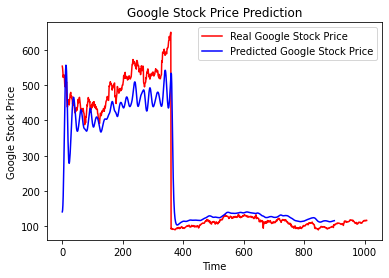

In [33]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [36]:
regressor.save("Ameya_lstm",save_format='h5')